In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [2]:
iden = pd.read_csv('train_identity.csv')

In [3]:
trans = pd.read_csv('train_transaction.csv')

In [4]:
join = trans.merge(iden)

In [5]:
def definir_categoria(x):
    if x == 0:
        return ('No fraude')
    else:
        return ('Fraude')

In [6]:
join['categoria'] = join['isFraud'].apply(definir_categoria)

### Visualizacion 1 - ViolinPlot

Estadisticas del tiempo de transaccion respecto de la validacion del id35

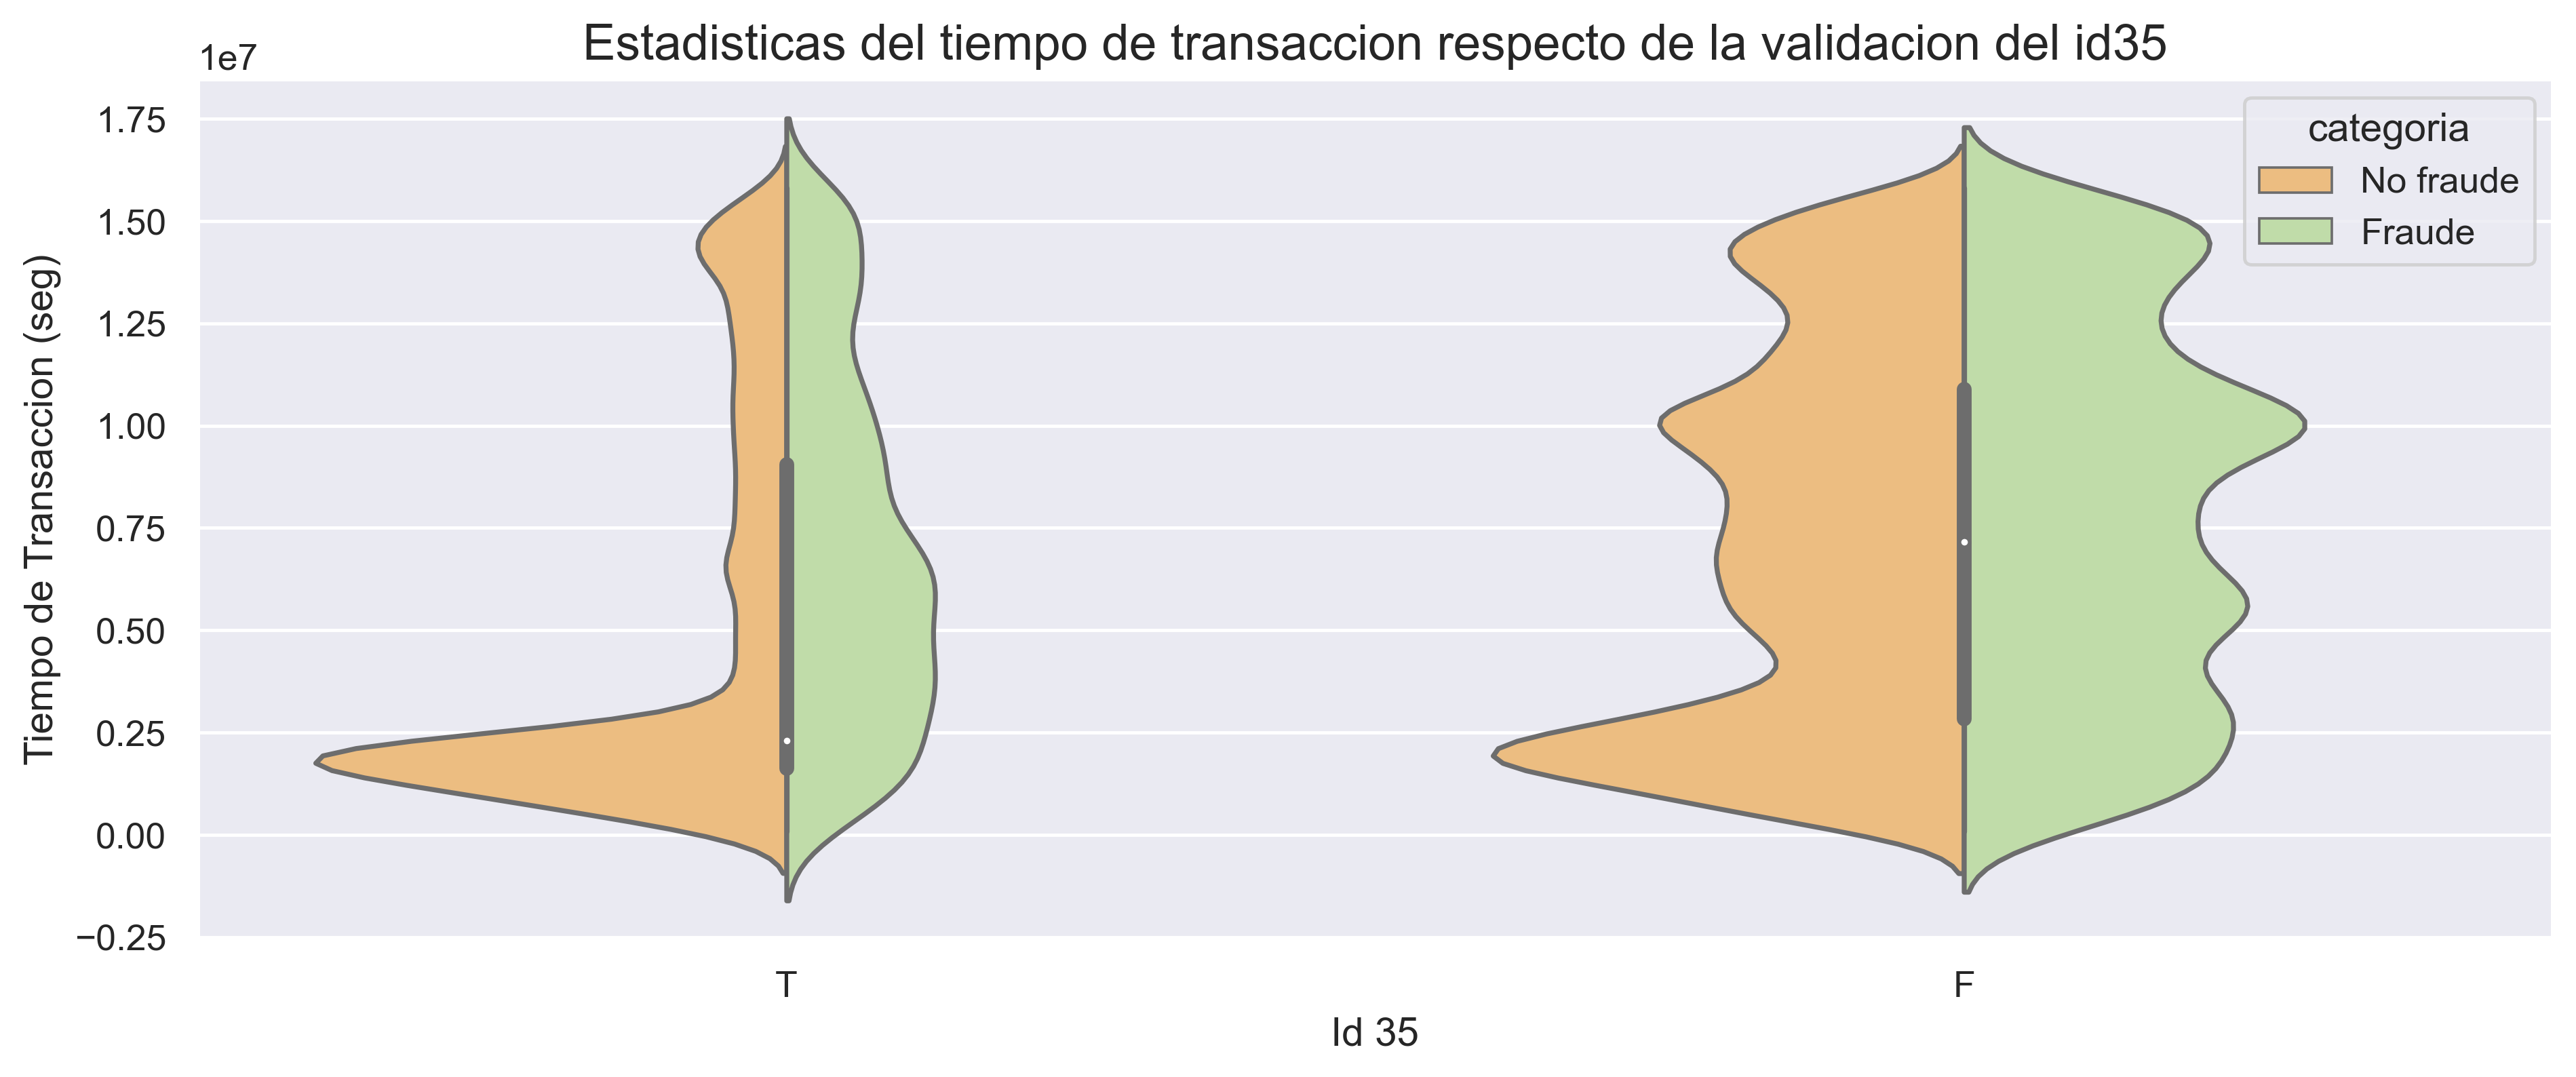

In [7]:
sns.set(rc = {'figure.figsize':(12.8,4.8)})
sns.set(rc={"figure.dpi":350})
graf = sns.violinplot(x="id_35", y="TransactionDT", hue="categoria",
                    data=join, palette="Spectral", split=True)
graf.set_title('Estadisticas del tiempo de transaccion respecto de la validacion del id35',size =15)
graf.set_ylabel('Tiempo de Transaccion (seg)', fontsize = 12)
graf.set_xlabel('Id 35', fontsize = 12)
fig = graf.get_figure()
fig.savefig("tiempoTransaccion-id35-violin.png",bbox_inches='tight')

### Visualizacion 2 - BoxPlot

Estadisticas del tiempo de transaccion respecto de la validacion del id34

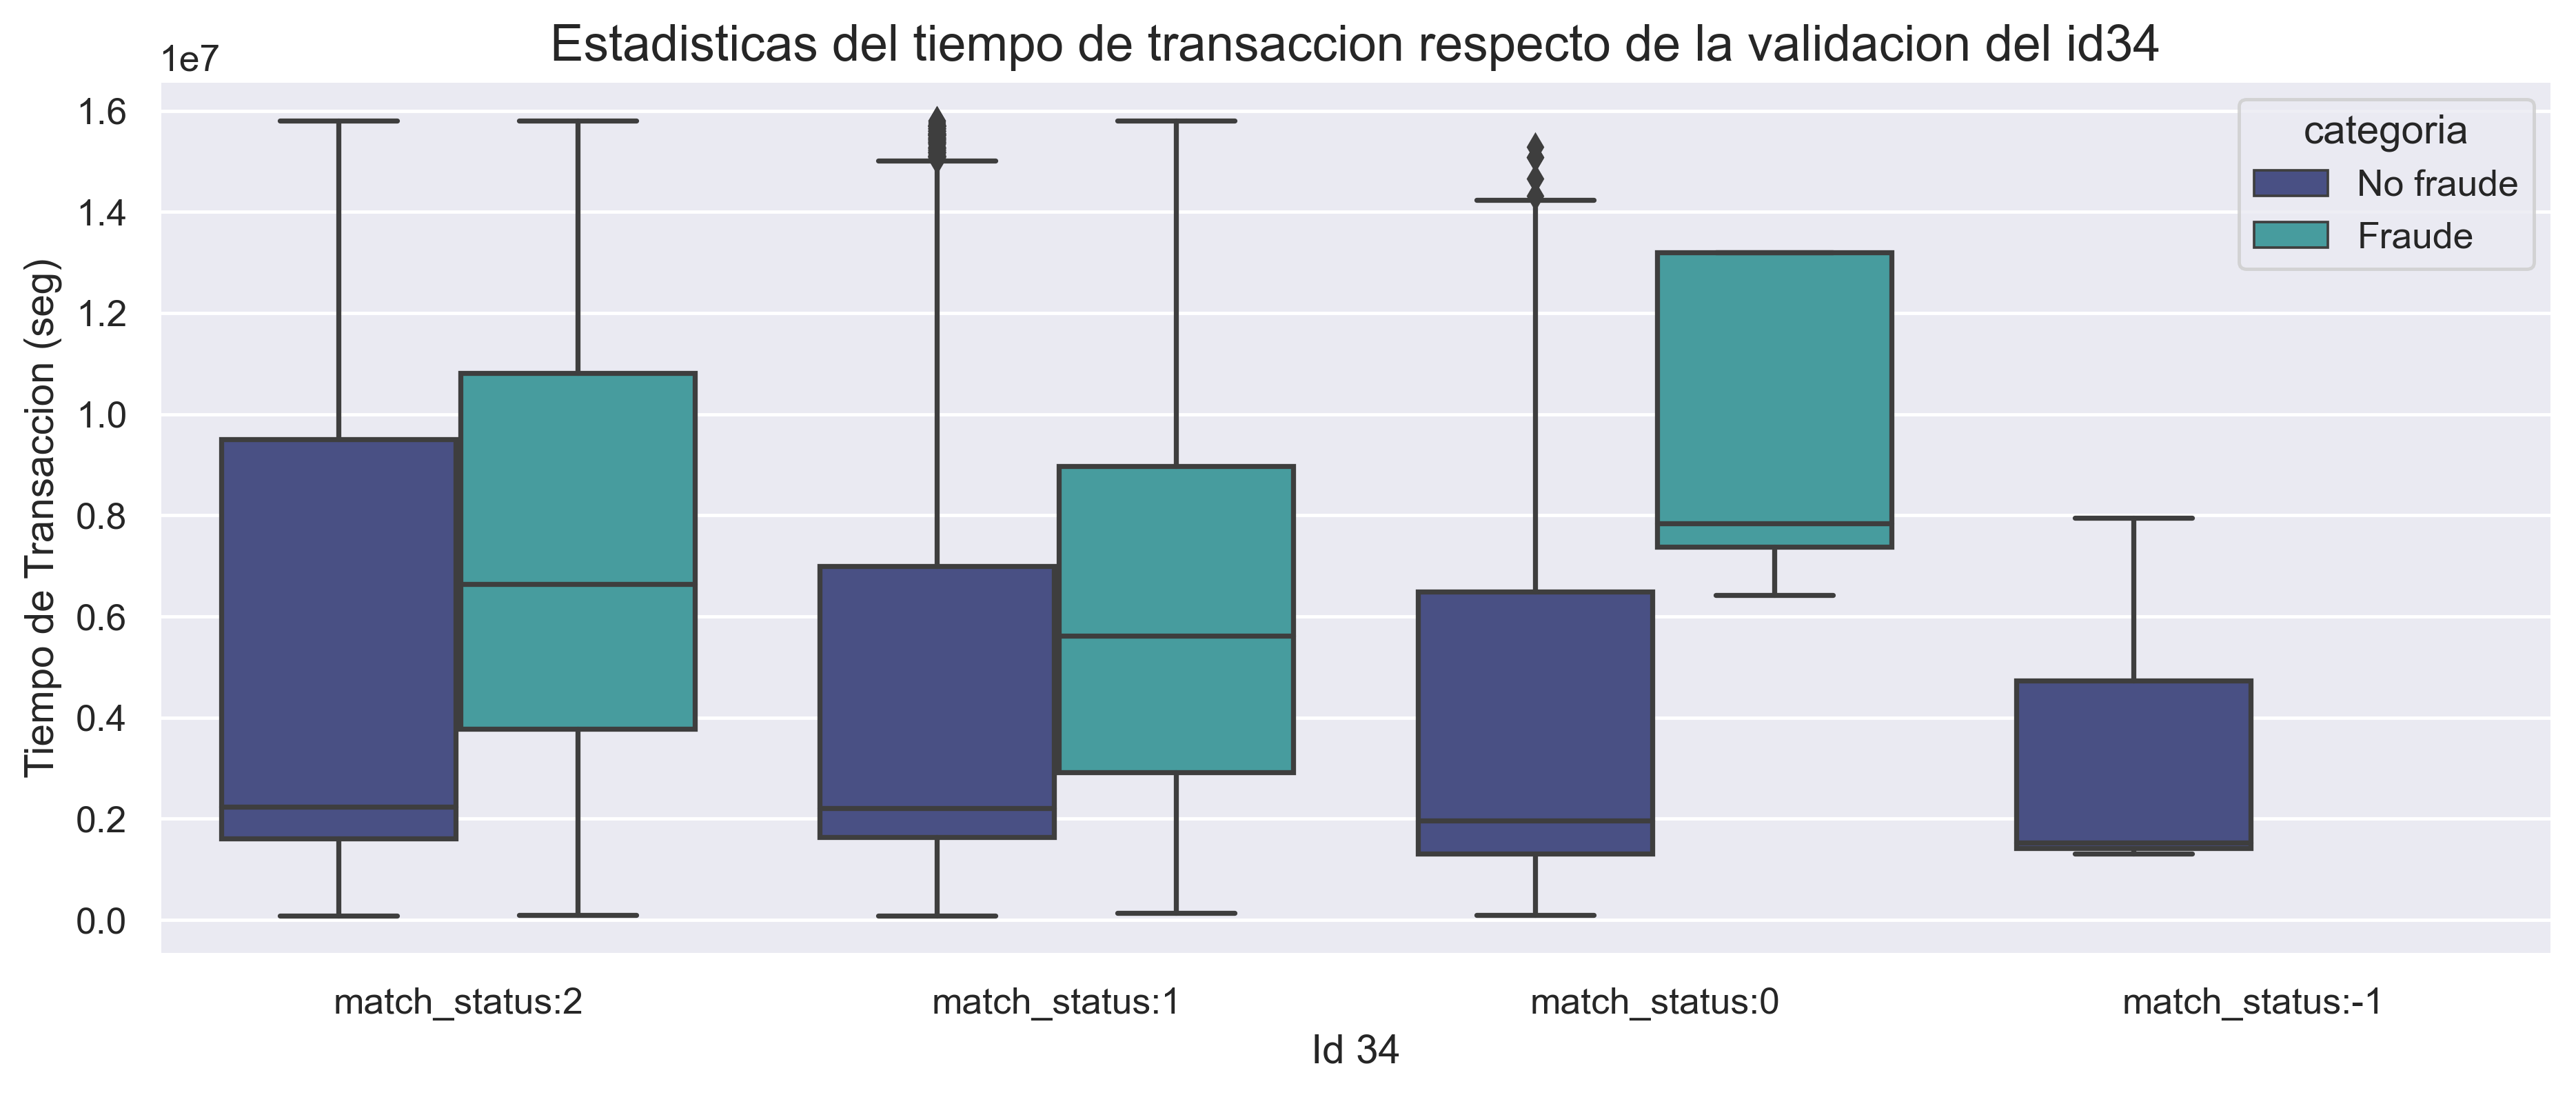

In [8]:
sns.set(rc={"figure.dpi":350})
sns.set(rc = {'figure.figsize':(12.8,4.8)})
graf = sns.boxplot(x="id_34", y="TransactionDT", hue="categoria",
                    data=join, palette = "mako")
                   #palette="muted")
graf.set_title('Estadisticas del tiempo de transaccion respecto de la validacion del id34',size =15)
graf.set_ylabel('Tiempo de Transaccion (seg)', fontsize = 12)
graf.set_xlabel('Id 34', fontsize = 12)
fig = graf.get_figure()
fig.savefig("tiempoTransaccion-id34-boxplot.png",bbox_inches='tight')

### Visualizacion 3 - BarPlot

In [9]:
total = trans.copy()

In [10]:
casosFraude = trans.copy()

In [11]:
total  = total[['P_emaildomain','isFraud']]

In [12]:
total = total['P_emaildomain'].value_counts().to_frame().reset_index()

In [13]:
total.rename(columns={'index':'domain','P_emaildomain':'usosTotal'},inplace=True)

In [14]:
casosFraude  = casosFraude[['P_emaildomain','isFraud']]

In [15]:
casosFraude = casosFraude[casosFraude['isFraud'] == 1]

In [16]:
casosFraude = casosFraude['P_emaildomain'].value_counts().to_frame().reset_index()

In [17]:
casosFraude.rename(columns={'index':'domain','P_emaildomain':'usosFraude'},inplace=True)

In [18]:
totalVSfraude = casosFraude.merge(total)

In [19]:
totalVSfraude.head(2)

,domain,usosFraude,usosTotal
0,gmail.com,9943,228355
1,hotmail.com,2396,45250


In [20]:
totalVSfraude['%ProbabilidadDeFraude'] = totalVSfraude['usosFraude']/totalVSfraude['usosTotal']*100

In [21]:
totalVSfraude.sort_values('%ProbabilidadDeFraude',ascending=False,inplace=True)

In [22]:
top10 = totalVSfraude.head(10)

In [23]:
ranking= top10.rank(method='min')
ranking = ranking['%ProbabilidadDeFraude'].astype(int).to_list()
ranking

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [24]:
npRanking = np.array(ranking)
npRanking = npRanking-1
npRanking

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [25]:
colores = sns.color_palette("Reds",10, as_cmap=False)
colores

[(0.9971703191080353, 0.901361014994233, 0.8562860438292964),
 (0.9926028450595925, 0.8141330257593233, 0.7383775470972702),
 (0.9882352941176471, 0.7068512110726644, 0.6010149942329873),
 (0.9882352941176471, 0.5857900807381776, 0.46223760092272204),
 (0.9857285659361784, 0.4722798923490965, 0.34678969627066514),
 (0.9673356401384082, 0.34918877354863515, 0.24775086505190314),
 (0.9256286043829296, 0.22006920415224915, 0.1677047289504037),
 (0.8193310265282583, 0.11672433679354094, 0.12341407151095732),
 (0.7130949634755863, 0.0744636678200692, 0.0962552864282968),
 (0.579361783929258, 0.04244521337946944, 0.07361783929257976)]

In [26]:
orden=[]
for i in npRanking:
    orden.append(colores[i])

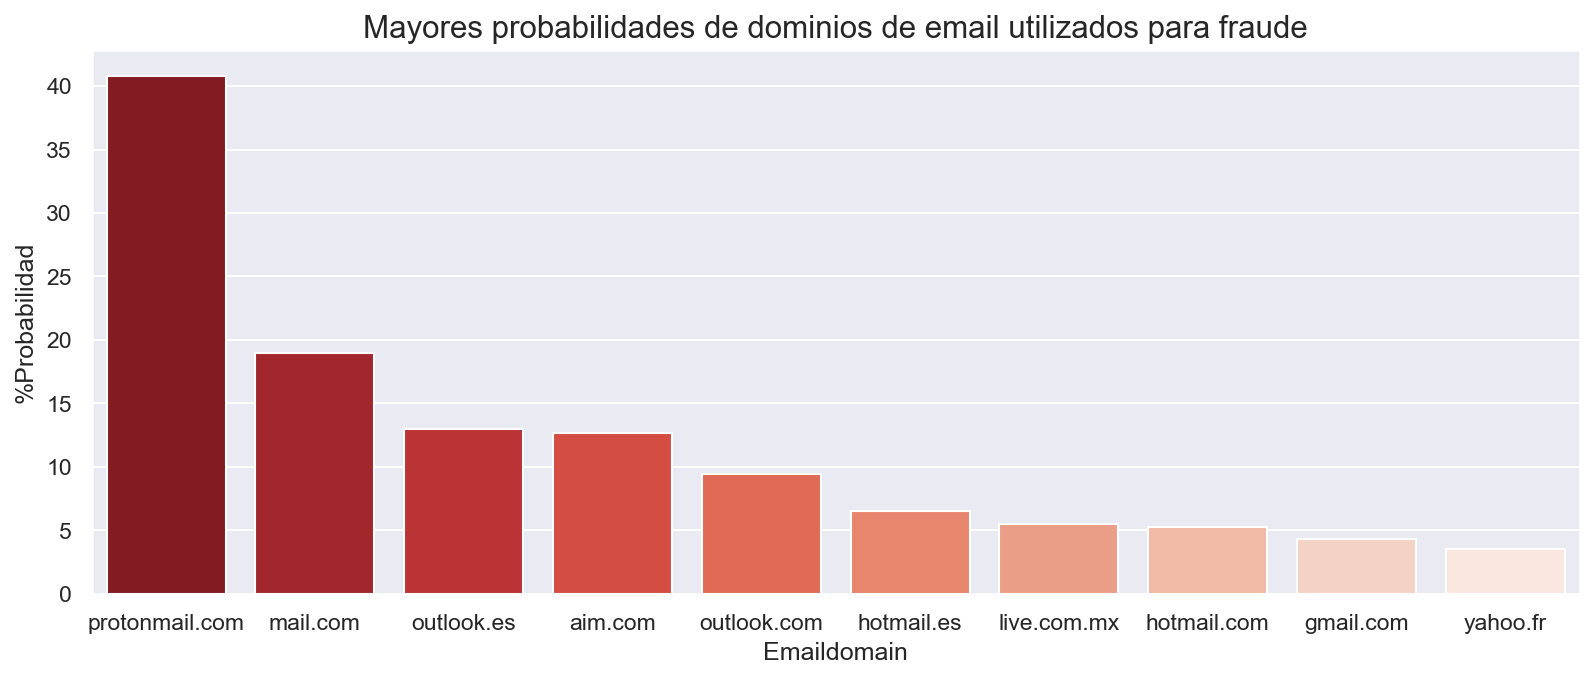

In [27]:
sns.set(rc={"figure.dpi":150})
sns.set(rc = {'figure.figsize':(12.8,4.8)})
graf = sns.barplot(x="domain", y='%ProbabilidadDeFraude', data=top10,palette=orden)
graf.set_title('Mayores probabilidades de dominios de email utilizados para fraude',size =15)
graf.set_ylabel('%Probabilidad', fontsize = 12)
graf.set_xlabel('Emaildomain', fontsize = 12)
fig = graf.get_figure()
fig.savefig("top-10-probabilidad-de-fraude-emaildomain-barplot.png",bbox_inches='tight')

In [28]:
del(total)

In [29]:
del(casosFraude)

In [30]:
del(totalVSfraude)

### Visualizacion 4 - HeatMap

Relacion de redes globales de tecnologia, \n los fraudes y tipos de productos

In [31]:
for_heatmap = trans.pivot_table(index='card4', columns='ProductCD', values='isFraud')

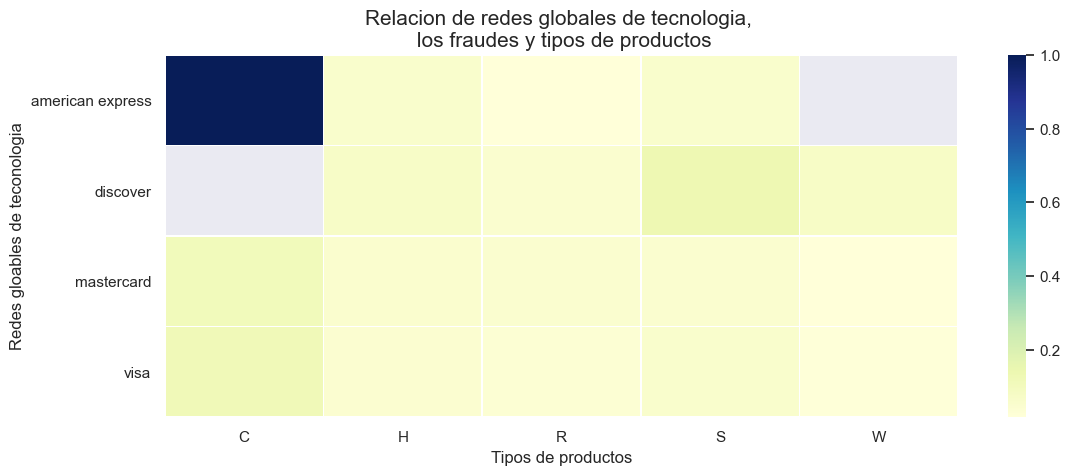

In [32]:
sns.set(rc={"figure.dpi":100})
graficoSJ = sns.heatmap(for_heatmap, linewidths=.5, cmap="YlGnBu")
graficoSJ.set_title('Relacion de redes globales de tecnologia, \n los fraudes y tipos de productos',size =15)
graficoSJ.set_ylabel('Redes gloables de teconologia', fontsize = 12)
graficoSJ.set_xlabel('Tipos de productos', fontsize = 12)
fig = graficoSJ.get_figure()
fig.savefig("heatmap-redes-prod-fraude.png",bbox_inches='tight')

### Visualizacion 5 - ViolinPlot

Estadisticas del tiempo de transaccion respecto de la validacion del id38

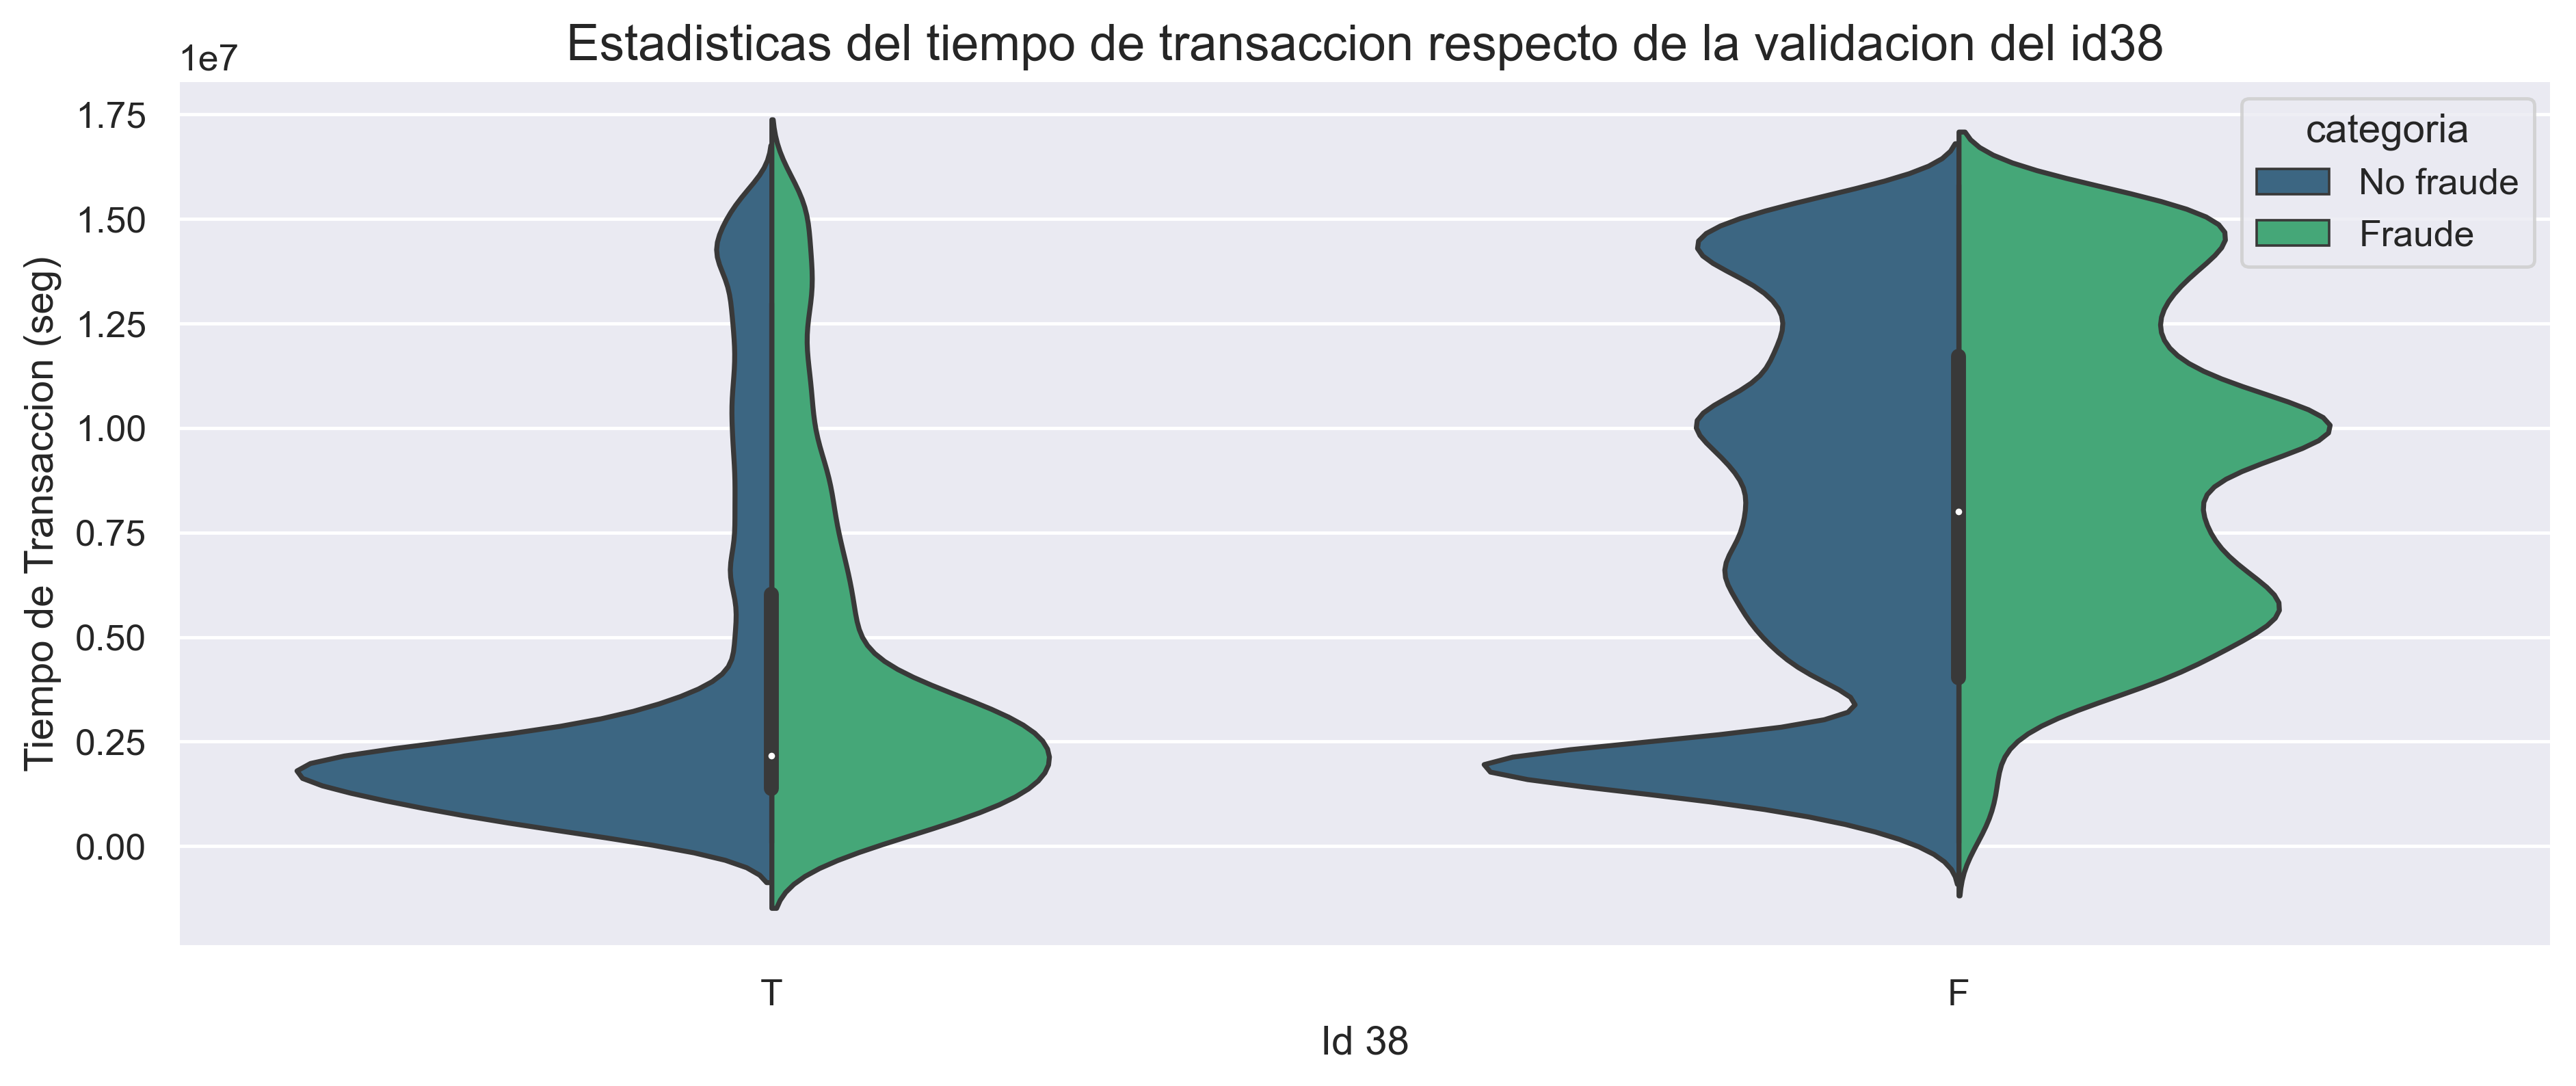

In [33]:
sns.set(rc={"figure.dpi":350})
sns.set(rc = {'figure.figsize':(12.8,4.8)})
graf = sns.violinplot(x="id_38", y="TransactionDT", hue="categoria",
                    data=join, palette="viridis", split=True)
graf.set_title('Estadisticas del tiempo de transaccion respecto de la validacion del id38',size =15)
graf.set_ylabel('Tiempo de Transaccion (seg)', fontsize = 12)
graf.set_xlabel('Id 38', fontsize = 12)
fig = graf.get_figure()
fig.savefig("tiempoTransaccion-id38-violin.png",bbox_inches='tight')

### Visualizacion 6 - BarPlot

In [34]:
total = join.copy()

In [35]:
casosFraude = join.copy()

In [36]:
total  = total[['id_30','isFraud']]

In [37]:
total = total['id_30'].value_counts().to_frame().reset_index()

In [38]:
total.rename(columns={'index':'id_30','id_30':'usosTotal'},inplace=True)

In [39]:
casosFraude  = casosFraude[['id_30','isFraud']]

In [40]:
casosFraude = casosFraude[casosFraude['isFraud'] == 1]

In [41]:
casosFraude = casosFraude['id_30'].value_counts().to_frame().reset_index()

In [42]:
casosFraude.rename(columns={'index':'id_30','id_30':'usosFraude'},inplace=True)

In [43]:
totalVScasosFraude = casosFraude.merge(total)

In [44]:
def spl(x):
    return(x.split(' ')[0])

In [45]:
totalVScasosFraude['id_30'] =totalVScasosFraude['id_30'].apply(spl)

In [46]:
grouped = totalVScasosFraude.groupby('id_30').agg({'usosFraude':'sum','usosTotal':'sum'})

In [47]:
grouped.reset_index(inplace=True)
grouped

,id_30,usosFraude,usosTotal
0,Android,542,6207
1,Linux,85,1136
2,Mac,298,13013
3,Windows,1268,36736
4,iOS,1240,19685
5,other,9,15


In [48]:
grouped = grouped[grouped['id_30'] != 'other']

In [49]:
grouped['proba'] = grouped['usosFraude']/grouped['usosTotal']

In [50]:
grouped

,id_30,usosFraude,usosTotal,proba
0,Android,542,6207,0.087321
1,Linux,85,1136,0.074824
2,Mac,298,13013,0.022900
3,Windows,1268,36736,0.034517
4,iOS,1240,19685,0.062992


In [51]:
grouped.sort_values('proba',ascending=False,inplace=True)

In [52]:
ranking= grouped.rank(method='min')
ranking = ranking['proba'].astype(int).to_list()
ranking

[5, 4, 3, 2, 1]

In [53]:
npRanking = np.array(ranking)
npRanking = npRanking-1
npRanking

array([4, 3, 2, 1, 0])

In [54]:
colores = sns.color_palette("Greens",5, as_cmap=False)
colores

[(0.8606689734717416, 0.9458362168396771, 0.8385697808535179),
 (0.681045751633987, 0.8718954248366013, 0.6562091503267974),
 (0.45176470588235296, 0.7670895809304115, 0.4612072279892349),
 (0.21568627450980393, 0.6287581699346405, 0.3333333333333333),
 (0.04359861591695502, 0.4648212226066897, 0.20369088811995384)]

In [55]:
orden=[]
for i in npRanking:
    orden.append(colores[i])

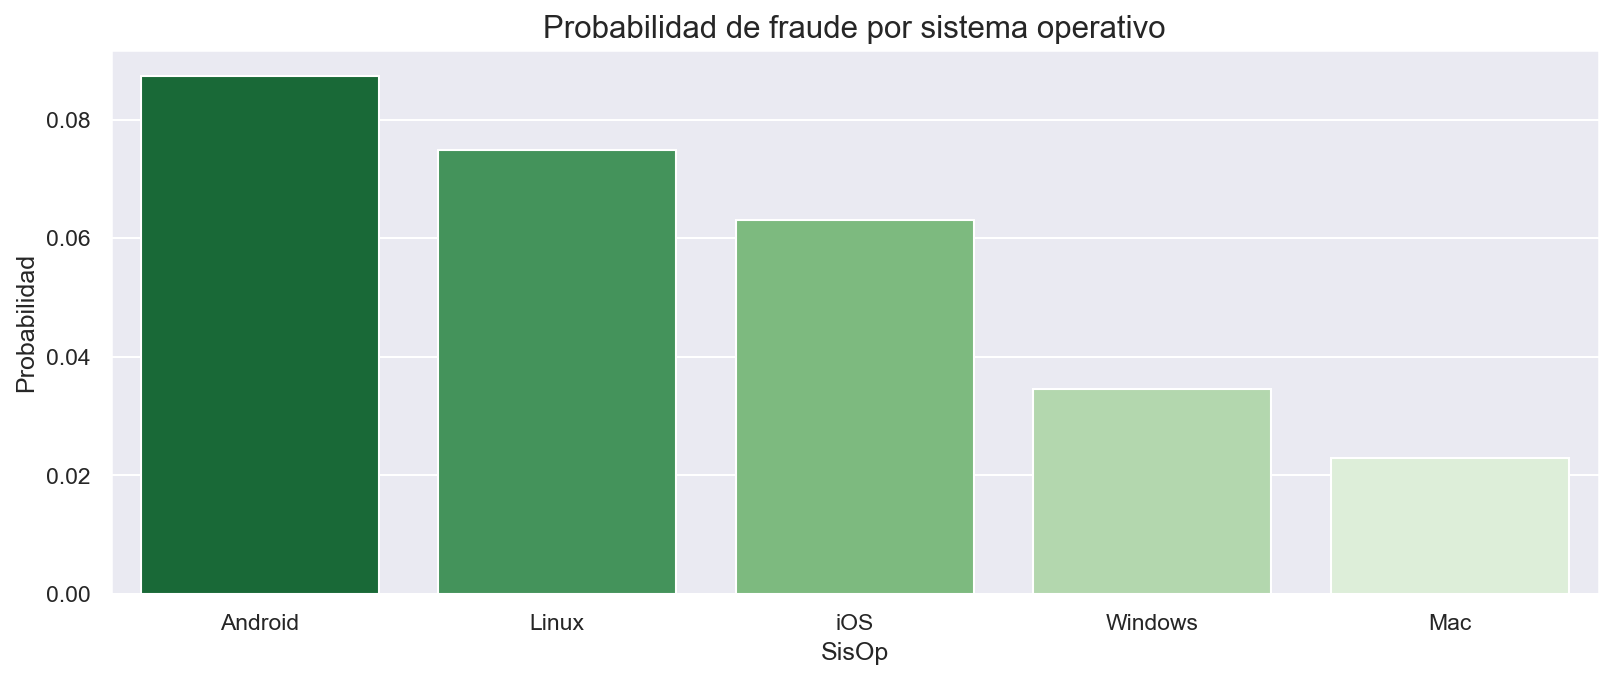

In [56]:
sns.set(rc={"figure.dpi":150})
sns.set(rc = {'figure.figsize':(12.8,4.8)})
graf = sns.barplot(x="id_30", y='proba', data=grouped,palette=orden)
graf.set_title('Probabilidad de fraude por sistema operativo',size =15)
graf.set_ylabel('Probabilidad', fontsize = 12)
graf.set_xlabel('SisOp', fontsize = 12)
fig = graf.get_figure()
fig.savefig("probabilidad-de-fraude-sisop-barplot.png",bbox_inches='tight')